In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../..')))

In [2]:
import numpy as np 
import scipy.fft
from operators.poisson_solver import gmres_solver
from operators.finite_difference import ddx_central, d2dx2_central, ddx_fwd
from operators.universal_functions import get_D_inv

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# Enable LaTeX rendering
matplotlib.rcParams['text.usetex'] = True

# Parameters

In [4]:
Nx = 101
Nv = 60000
L = 4 * np.pi
v_a = -4
v_b = 4
epsilon = 1e-2
k0 = 0.5
n0 = 1
alpha = np.sqrt(2)
nu = 0
T = 35
dt = 2
t_vec = np.linspace(0, T, int(T/dt) + 1, endpoint=True)

In [5]:
# x-v space
x = np.linspace(0, L, Nx, endpoint=False)
v = np.linspace(v_a, v_b, Nv, endpoint=True)
dv = np.abs(v[1] - v[0])
dx = np.abs(x[1] - x[0])

In [6]:
# simulation operators
Dx = ddx_central(Nx=Nx+1, dx=dx, periodic=True, order=2)
Dx_inv = get_D_inv(Nx=Nx, D=Dx)

# Simulation results

In [7]:
# load the simulation results
# save results
Y = np.load("/Users/oissan/PycharmProjects/mixed_methods/data/finite_difference/two_stream/sol_u_Nv_" + str(Nv) + "_Nx_101__35.npy")

# save results
# Y = np.load("/Users/oissan/PycharmProjects/mixed_methods/examples/finite_difference/Y3.npy")

In [8]:
np.shape(Y)

(101, 60000, 18)

In [9]:
rho = -np.sum(Y, axis=1) * dv

In [10]:
E = np.zeros((Nx, len(t_vec)))

for tt in range(len(t_vec)):
    # electric field computed (poisson solver)
    E[:, tt] = gmres_solver(rhs=rho[:, tt], D=Dx, D_inv=Dx_inv, a_tol=1e-12, r_tol=1e-12)

In [11]:
np.save("/Users/oissan/PycharmProjects/mixed_methods/data/finite_difference/two_stream/E_Nv_" + str(Nv) + "_Nx_101__35.npy", E)

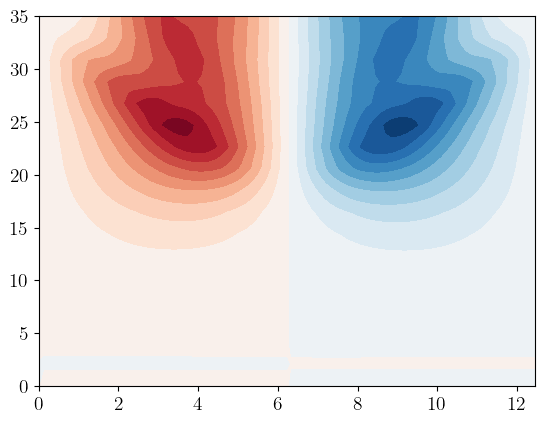

In [12]:
plt.contourf(x, t_vec, E.T, cmap="RdBu", levels=20)

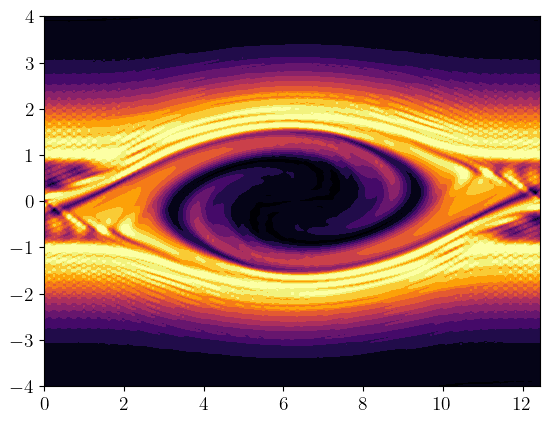

In [13]:
plt.contourf(x, v, Y[:, :, -1].T, vmin=0, vmax=0.3, cmap="inferno", levels=20)